# Exploration

## Introduction 

In this notebook, we explore different possibilities for generating and storing data. 

In [1]:
# Importing Necessary Libraries

import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import os
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

import plotly.io as pio
pio.renderers.default = "png"

from IPython.display import display, Markdown
import ipywidgets as widgets
from typing import List, Union


from aztec_gddt.experiment import *
from aztec_gddt.params import *
from aztec_gddt.utils.sim_run import sim_run

## Creating Proof-of-Concept GUI Input Elements (Primitive)

This is me playing around with creating some type of basic GUI to make a pipeline for:
user input -> simulation -> data -> visualization. 

## Current Parameter Values for Gas Threshold Test 
| Parameter | Values to Use |
| --- | --- |
| label | default |
| timestep_in_blocks | 1 |
| uncle_count | 0 |
| reward_per_block | 1.0 |
| fee_subsidy_fraction | 1.0 |
| phase_duration_proposal | 10 |
| phase_duration_reveal | 10 |
| phase_duration_commit_bond | 10 |
| phase_duration_rollup | 30 |
| phase_duration_race | 30 |
| stake_activation_period | 40 |
| unstake_cooldown_period | 40 |
| proposal_probability_per_user_per_block | 0.2 |
| block_content_reveal_probability | 0.2 |
| tx_proof_reveal_probability | 0.2 |
| rollup_proof_reveal_probability | 0.2 |
| commit_bond_reveal_probability | 0.2 |
| gas_threshold_for_tx | [1.0, 10.0, 100.0] |
| blob_gas_threshold_for_tx | 50 |
| proving_marketplace_usage_probability | 0.3 |
| rewards_to_provers | 0.3 |
| rewards_to_relay | 0.01 |
| gwei_to_tokens | 1e-09 |



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.5.1
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 700, 26, 3, 13)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (700, 26, 3, 13)


Initializing configurations:   0%|          | 0/3 [00:00<?, ?it/s]

Execution Method: parallelize_simulations
Execution Mode: parallelized


Flattening results:   0%|          | 0/3 [00:00<?, ?it/s]

Total execution time: 28.77s


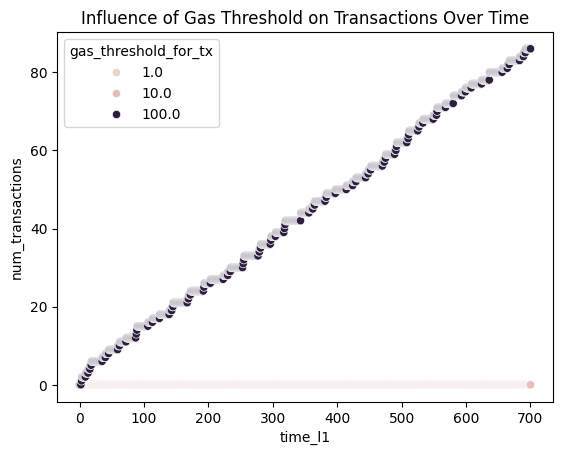

In [ ]:


context_label = widgets.Label(
    value="Enter the values of gas threshold that you wish to explore, then click 'Process Input'. "
)

text_input = widgets.Text(
    value='',
    placeholder='Enter values separated by commas',
    description='Input:',
    disabled=False
)

def process_input(input_string):
    # Splitting the string by commas and stripping whitespace
    values_list = [float(item.strip()) for item in input_string.split(',')]
    return values_list

button = widgets.Button(description="Process Input")

params_dict = {} #global dict for access by gui elements

def on_button_clicked(b, 
                     val_to_set: str = 'gas_threshold_for_tx'):
    # Using the text input's value
    vals_list = process_input(text_input.value)
    params_dict[val_to_set] = vals_list

    my_table = create_model_params_table(model_name = "Gas Threshold Test",
                          params_to_modify = params_dict,  
                          params_to_exclude = ["gas_estimators", "tx_estimators", "slash_params"],                      
                          display_to_screen = True)

    sim_df = custom_run(params_to_modify=params_dict)
    sim_df["num_transactions"] = sim_df['transactions'].apply(lambda x: len(x))
    sns.scatterplot(data = sim_df,
                x = "time_l1",
                y = "num_transactions",
                hue = "gas_threshold_for_tx")

    plt.title("Influence of Gas Threshold on Transactions Over Time") #TODO: Generalize
    plt.show()
    
    return params_dict

button.on_click(on_button_clicked)

In [4]:
gui = widgets.VBox([context_label, text_input, button])
gui


## Creating a Custom Experiment

We create a custom experiment using the `custom_run` method, as shown below. 

In [ ]:
my_params_to_modify = {
     
                       }


my_table = create_model_params_table(model_name = "Gas Threshold Test",
                          params_to_modify = my_params_to_modify,  
                          params_to_exclude = ["gas_estimators", "tx_estimators", "slash_params"],                      
                          display_to_screen = True)


In [ ]:
# sim_args = (INITIAL_STATE,
#             tx_proof_reveal_sweep,
#             AZTEC_MODEL_BLOCKS,
#             70,
#             10)
 
# sim_df = sim_run(*sim_args)
# sim_df.head()

my_params_to_modify = {"gas_threshold_for_tx": [1, 10, 100]}
sim_df = custom_run(params_to_modify=my_params_to_modify)

In [ ]:
# sim_df.to_csv("limit_cases_proof_reveal_probability.csv")

In [ ]:
# sim_df.columns

In [ ]:
gas_fees_df[gas_fees_df['time_l1'] == 700].groupby('gas_threshold_for_tx')['num_transactions'].mean()

## Accessing the Data 

The data produced by the cadCAD simulation model, along with associated metrics, is stored in a dataframe with multiple variables. In future versions, the KPI calculations will also be produced during the simulation run. 

In [ ]:
sim_df.head(4)

In [ ]:
len(sim_df)

The data from this run can be saved to a `.csv` file. This is useful for e.g. combining results from experiments with different parameter choices. 

In [ ]:
sim_df.to_csv("test_data.csv")

In [ ]:
sim_df.columns

In [ ]:
sns.scatterplot(x = "time_l1", y = "finalized_blocks_count", 
               data = sim_df, hue = "tx_proof_reveal_probability")

## Visual Analysis

In this section we demonstrate several graphical plots that can easily be generated from the data produced by the simulation model runs.

In [ ]:
sns.lineplot(x=sim_df.time_l1, 
             y=sim_df.current_process.map(lambda x: x.phase.name if x is not None else None))

We have access to data on finalized blocks over time. In addition, the plots can be saved for further analysis and comparison. Here we create a plot of finalized blocks vs. time and save it in a relevant png file. (Again, this shows capability, not actual results, due to parameter choices.)

In [ ]:
sns.lineplot(x=sim_df.time_l1, 
             y=sim_df.finalized_blocks_count)
             
plt.xlabel("Time (in L1 blocks)")
plt.ylabel("Finalized Blocks")
plt.title("Finalized Blocks over L1 Timesteps")
plt.show()

In [ ]:
plt.savefig("finalized_blocks_plot.png")

Among other things, the data generated by the simulation also makes it possible to track the growth rate of blocks produced, as well as the rewards accrued to different types of agents in the system. 

In [ ]:
sns.lineplot(x=sim_df.time_l1, 
             y=sim_df.cumm_block_rewards)

plt.xlabel("Time (in L1 blocks)")
plt.ylabel("Cumulative Block Rewards")
plt.title("Cumulative Block Rewards over L1 Timesteps")
plt.savefig("cum_block_rewards_over_time.png")
plt.show()

In [ ]:
sim_df['balance_sequencers'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_sequencer == True))
sim_df['balance_provers'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_prover == True))
sim_df['balance_relays'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_relay == True))
sim_df['balance_burnt'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.uuid == 'burnt'))
sim_df['balance_l1_builder'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.uuid == 'l1-builder'))
